### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №6

задание:

1.	Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder). 

2.	Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

3.	Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений. 

4.	При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`. 

5.	Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map). 

6.	Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

7.	Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 97.5%.

8.	Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Индивидуальный вариант: Wine dataset

In [101]:
import pandas as pd
import numpy as np


In [102]:
# считываем датасет из репозитория
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [103]:
# сводка данных для числовых столбцов
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [104]:
# проверим тип данных для каждой колонки
df.dtypes
# все числовые признаки правильно классифицированы

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [105]:
df.isnull().sum(axis=0)
# пустые значения отсутствуют

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [111]:
df.groupby('quality').count()
# метка класса содержится в столбце quality, который содержит оценку 3-8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [115]:
from sklearn.feature_selection import SelectKBest, chi2

# найдем 2 признака, имеющих наиболее выраженную взаимосвязь с меткой класса
array = df.values
X = array[:,0:11] # входные переменные
Y = array[:,11] # выходная переменная

# отбор признаков
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)

print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
df_new = df.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Оценки признаков:
 [1.12606524e+01 1.55802891e+01 1.30256651e+01 4.12329474e+00
 7.52425579e-01 1.61936036e+02 2.75555798e+03 2.30432045e-04
 1.54654736e-01 4.55848775e+00 4.64298922e+01]

Отобранные признаки:
    free sulfur dioxide  total sulfur dioxide
0                 11.0                  34.0
1                 25.0                  67.0
2                 15.0                  54.0
3                 17.0                  60.0
4                 11.0                  34.0


In [119]:
# вычислим матрицу корреляций
corr_matrix = df[['free sulfur dioxide','total sulfur dioxide','quality']].corr()
corr_matrix

,free sulfur dioxide,total sulfur dioxide,quality
free sulfur dioxide,1.000000,0.667666,-0.050656
total sulfur dioxide,0.667666,1.000000,-0.185100
quality,-0.050656,-0.185100,1.000000


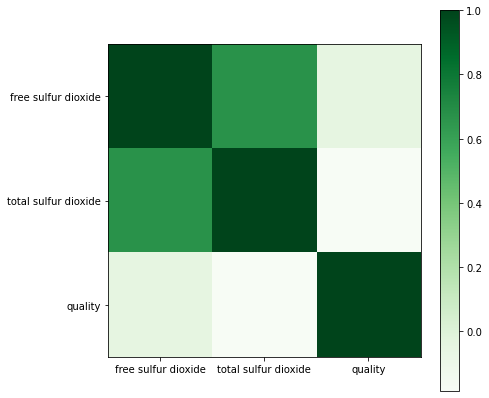

In [121]:
# выведем эту матрицу в виде тепловой карты
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);

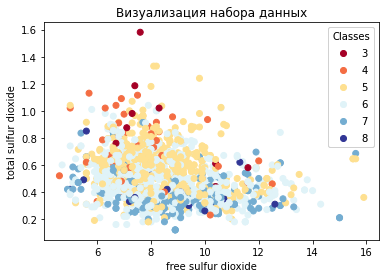

In [140]:
# визуализируем данные диаграммой рассеяния
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.RdYlBu);
ax.set_xlabel("free sulfur dioxide")
ax.set_ylabel("total sulfur dioxide")
ax.set_title("Визуализация набора данных")

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

In [159]:
from sklearn.decomposition import PCA 

# найдем размерность метода главных компонент
pca = PCA(n_components=2)
fit = pca.fit(X)
pcad = fit.transform(X)

print("Объясняемая дисперсия:", sum(fit.explained_variance_ratio_)*100)
# параметр n_components может быть целым числом в диапазоне 2-11, при задании значения 1 доля дисперсия ниже заданной границы

Объясняемая дисперсия: 99.4945280970281


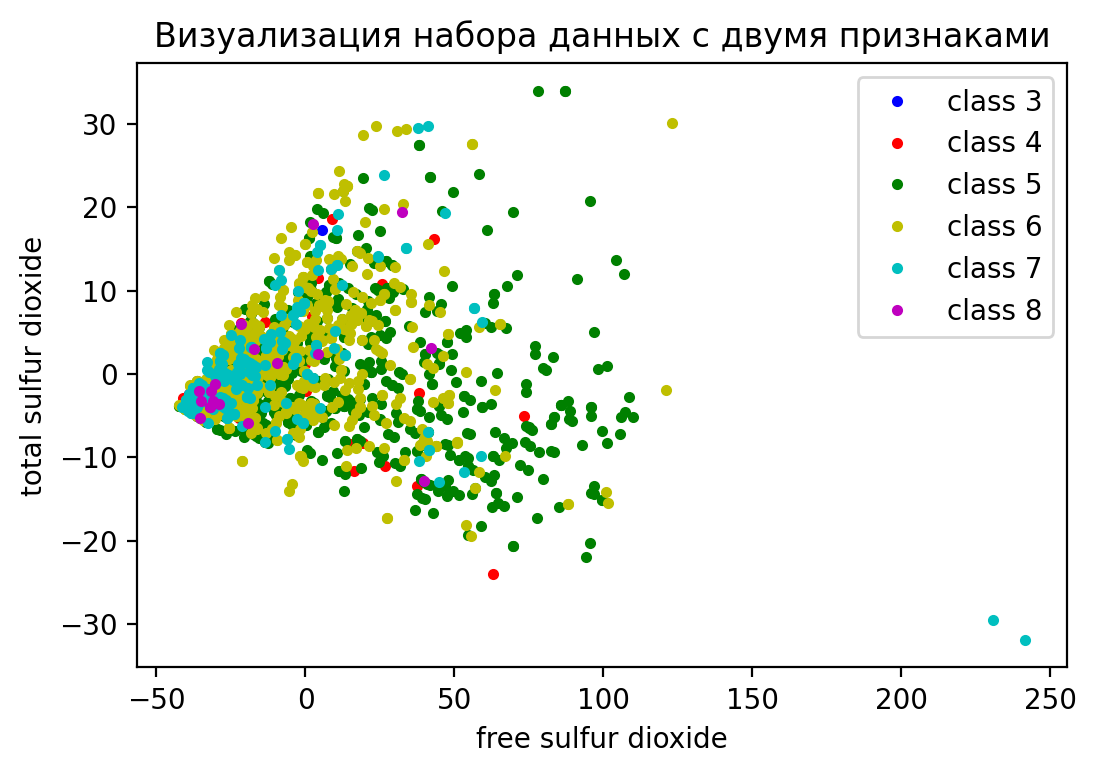

In [174]:
# визуализируем набор данных с двумя признаками, используя диаграмму рассеяния
plt.figure( figsize=(6, 4), dpi=200)

plt.plot(pcad[Y==3,0], pcad[Y==3,1],"b.", label='class 3') 
plt.plot(pcad[Y==4,0], pcad[Y==4,1],"r.", label='class 4') 
plt.plot(pcad[Y==5,0], pcad[Y==5,1],"g.", label='class 5')
plt.plot(pcad[Y==6,0], pcad[Y==6,1],"y.", label='class 6');
plt.plot(pcad[Y==7,0], pcad[Y==7,1],"c.", label='class 7');
plt.plot(pcad[Y==8,0], pcad[Y==8,1],"m.", label='class 8');

plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.title("Визуализация набора данных с двумя признаками")
plt.legend()